# Lesson 1: Introduction to time series

Neurocampus course "Signals of the whole brain"

Daria Kleeva

dkleeva@gmail.com

February 18, 2025



## Time series

A **time series** is a signal measured over time.

In EEG/MEG, each channel records voltage or magnetic field changes as a function of time. So the raw recording is a set of time series.

### Core concepts

1) Continuous-time signal

2) Discrete-time signal

3) Analog signal

4) Digital signal

In practice for EEG/MEG:
- Physics in the head and sensors is **continuous** and **analog**.
- The acquisition system converts it into **discrete-time** and **digital** data.

### Examples

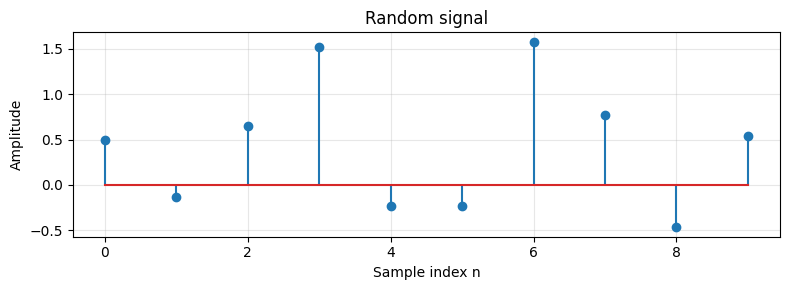

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.randn(10)  
n = np.arange(len(x))

plt.figure(figsize=(8, 3))
plt.stem(n, x)
plt.title('Random signal')
plt.xlabel('Sample index n')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [6]:
# Basic signal descriptors
print('Indices n:', n)
print('Amplitude values x[n]:', np.round(x, 3))
print('Amplitude range [min, max]:', [x.min(), x.max()])
print('Min amplitude:', x.min())
print('Max amplitude:', x.max())
print('Mean:', x.mean())
print('Variance:', x.var())

Indices n: [0 1 2 3 4 5 6 7 8 9]
Amplitude values x[n]: [ 0.497 -0.138  0.648  1.523 -0.234 -0.234  1.579  0.767 -0.469  0.543]
Amplitude range [min, max]: [np.float64(-0.4694743859349521), np.float64(1.5792128155073915)]
Min amplitude: -0.4694743859349521
Max amplitude: 1.5792128155073915
Mean: 0.44806111169875623
Variance: 0.4704669452131567


In a computer we cannot create a truly continuous signal, but we can use a very dense time grid as a practical approximation.

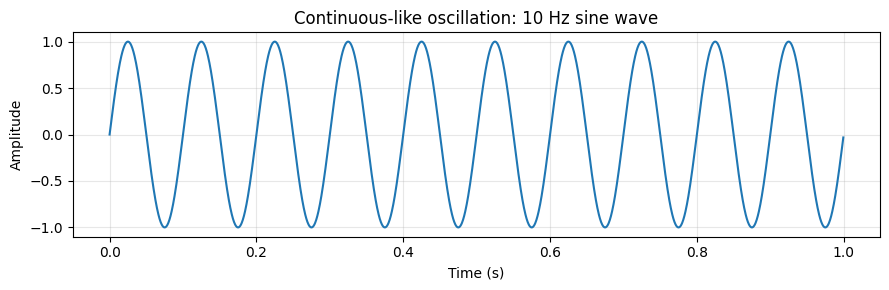

In [10]:
fs = 2000
T = 1.0         
f = 10           

t_cont = np.linspace(0, T, int(fs * T), endpoint=False)
x_cont = np.sin(2 * np.pi * f * t_cont)

plt.figure(figsize=(9, 3))
plt.plot(t_cont, x_cont, lw=1.5)
plt.title('Continuous-like oscillation: 10 Hz sine wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<div style="color: blue;">
Try:

- To change frequency;
- To change amplitude;
- To add phase;
- To add noise;
- To mix oscillations.
</div>

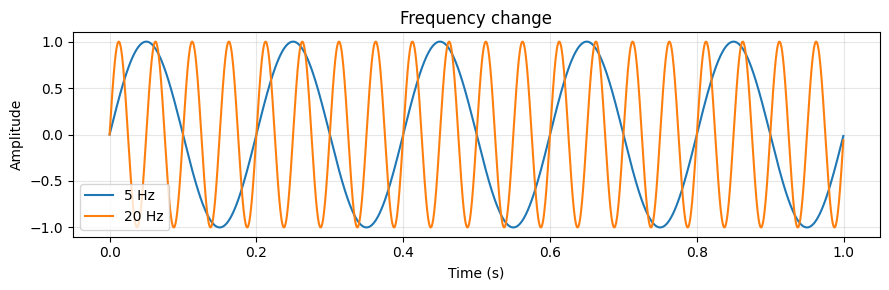

In [ ]:
# 1) Frequency change
x_f5 = np.sin(2 * np.pi * 5 * t_cont)
x_f20 = np.sin(2 * np.pi * 20 * t_cont)

plt.figure(figsize=(9, 3))
plt.plot(t_cont, x_f5, lw=1.5, label='5 Hz')
plt.plot(t_cont, x_f20, lw=1.5, label='20 Hz')
plt.title('Frequency change')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



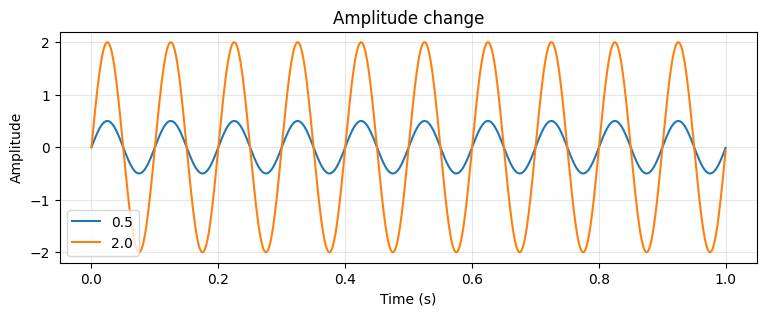

In [20]:
# 2) Amplitude change
x_A05 = 0.5 * np.sin(2 * np.pi * f * t_cont)
x_A2 = 2.0 * np.sin(2 * np.pi * f * t_cont)

plt.figure(figsize=(9, 3))
plt.plot(t_cont, x_A05, lw=1.5, label='0.5')
plt.plot(t_cont, x_A2, lw=1.5, label='2.0')
plt.title('Amplitude change')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.legend()


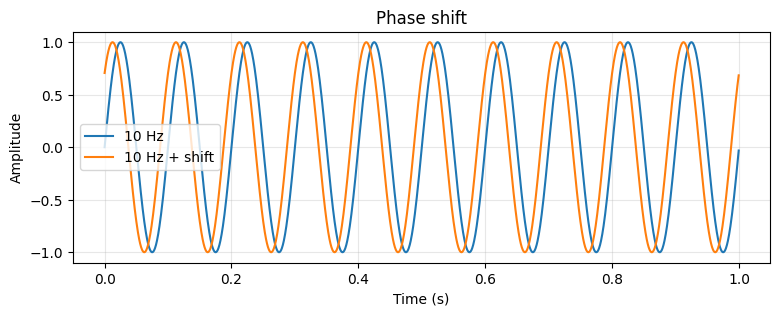

In [22]:
# 3) Phase shift
x_phi = np.sin(2 * np.pi * f * t_cont + np.pi / 4)

plt.figure(figsize=(9, 3))
plt.plot(t_cont, x_cont, lw=1.5, label='10 Hz')
plt.plot(t_cont, x_phi, lw=1.5, label='10 Hz + shift')
plt.title('Phase shift')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.legend()


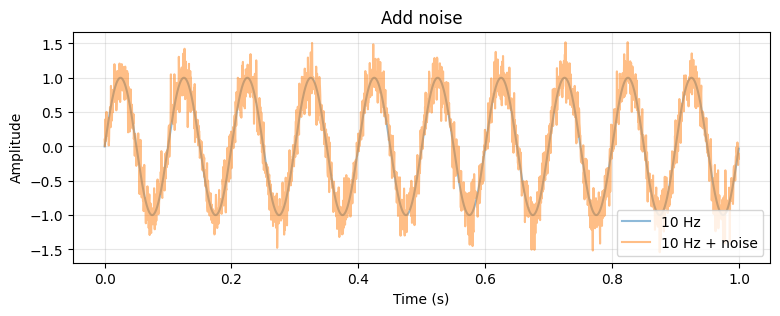

In [24]:
# 4) Add noise
np.random.seed(42)
noise_level=0.2
x_noisy = x_cont + noise_level * np.random.randn(len(t_cont))
plt.figure(figsize=(9, 3))
plt.plot(t_cont, x_cont, lw=1.5, label='10 Hz', alpha=0.5)
plt.plot(t_cont, x_noisy, lw=1.5, label='10 Hz + noise', alpha=0.5)
plt.title('Add noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.legend()



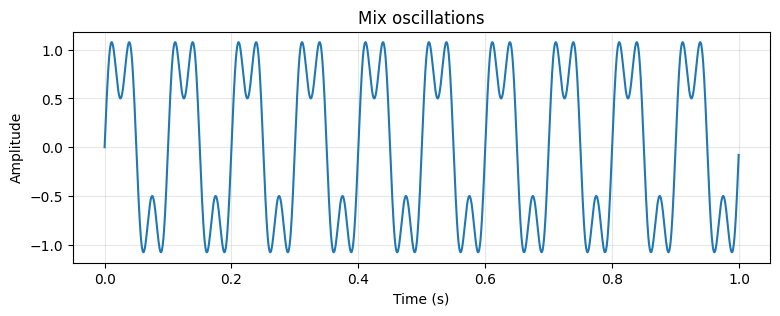

In [29]:
# 5) Mix oscillations
f_1 = 10
f_2 = 30   
x_mix = np.sin(2 * np.pi * f_1 * t_cont) + 0.5 * np.sin(2 * np.pi * f_2 * t_cont)
plt.figure(figsize=(9, 3))
plt.plot(t_cont, x_mix, lw=1.5)
plt.title('Mix oscillations')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

**Sampling**  (continuous-time -> discrete-time) is the process of measuring the signal at specific time points.

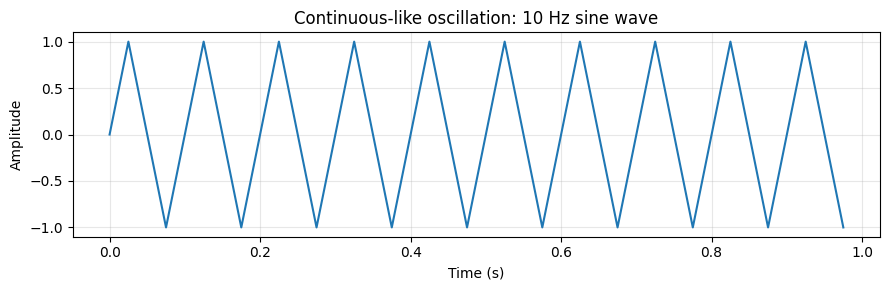

In [30]:
fs = 40

f=10

t_cont = np.linspace(0, T, int(fs * T), endpoint=False)
x_cont = np.sin(2 * np.pi * f * t_cont)

plt.figure(figsize=(9, 3))
plt.plot(t_cont, x_cont, lw=1.5)
plt.title('Continuous-like oscillation: 10 Hz sine wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Aliasing effect:**  when we sample too slowly, a fast oscillation can look like a slower one.

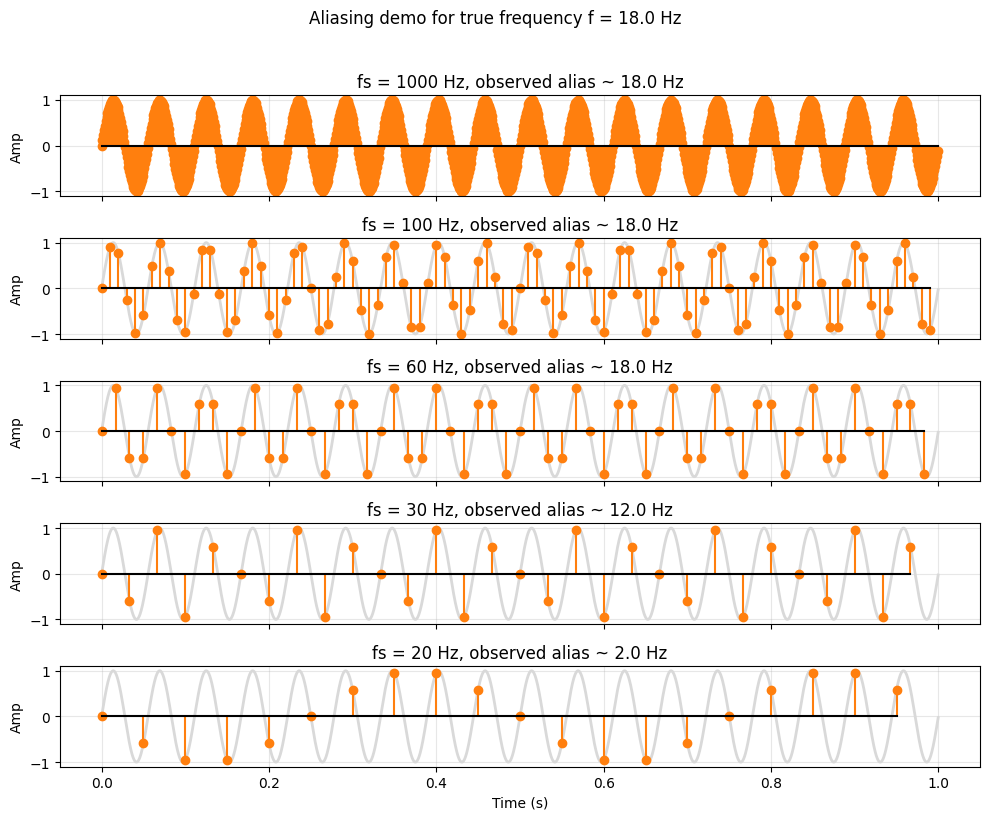

In [31]:
f_true = 18.0  
T = 1.0    

fs_ref = 4000
t_ref = np.linspace(0, T, int(fs_ref * T), endpoint=False)
x_ref = np.sin(2 * np.pi * f_true * t_ref)

# Sampling rates to compare
fs_list = [1000, 100, 60, 30, 20]  

#Computes the 'apparent' frequency we observe when sampling at fs Hz
def alias_frequency(f, fs):
    k = np.round(f / fs)
    f_alias = np.abs(f - k * fs)
    if f_alias > fs / 2:
        f_alias = fs - f_alias
    return f_alias

fig, axes = plt.subplots(len(fs_list), 1, figsize=(10, 8), sharex=True)

for ax, fs in zip(axes, fs_list):
    n = np.arange(0, int(T * fs))
    t_s = n / fs
    x_s = np.sin(2 * np.pi * f_true * t_s)

    ax.plot(t_ref, x_ref, color='0.85', lw=2, label='true signal (dense)')
    ax.stem(t_s, x_s, linefmt='C1-', markerfmt='C1o', basefmt='k-')

    f_a = alias_frequency(f_true, fs)
    nyq = fs / 2
    ax.set_title(f'fs = {fs} Hz, observed alias ~ {f_a:.1f} Hz')
    ax.grid(alpha=0.3)

axes[-1].set_xlabel('Time (s)')
for ax in axes:
    ax.set_ylabel('Amp')

plt.suptitle(f'Aliasing demo for true frequency f = {f_true} Hz', y=1.02)
plt.tight_layout()
plt.show()

**Nyquist-Shannon Sampling Theorem (practical form)**

If a continuous-time signal contains no frequencies above \(f_{\max}\), then it can be reconstructed from its samples without loss when:

$$
f_s > 2 f_{\max}
$$

- $2f_{\max}$ is the **Nyquist rate**.
- $f_s/2$ is the **Nyquist frequency**.

If $f_s < 2f_{\max}$, high-frequency components fold into lower frequencies (**aliasing**), and exact reconstruction is impossible.

**Rule of thumb:** to analyze frequencies up to $f_{\max}$, sample at least a little higher than $2f_{\max}$ (often 3-5x in practice), and use an anti-alias filter.

<div style="color: blue;">
How would you compute the period and the frequency from the given signal?
</div>

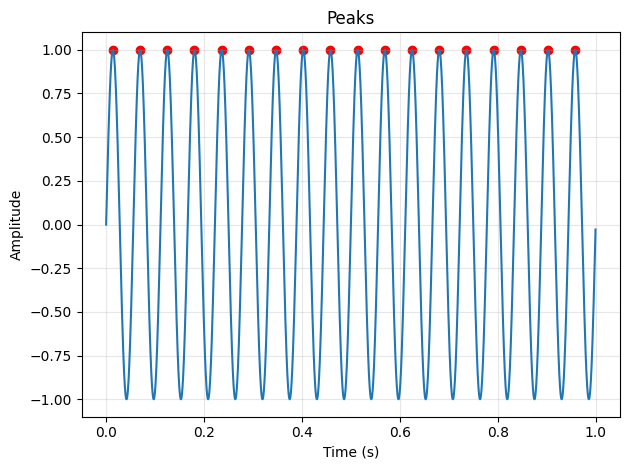

In [38]:
from scipy.signal import find_peaks
peaks = find_peaks(x_ref)
plt.plot(t_ref, x_ref)
plt.scatter(t_ref[peaks[0]], x_ref[peaks[0]], color='red')
plt.title('Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


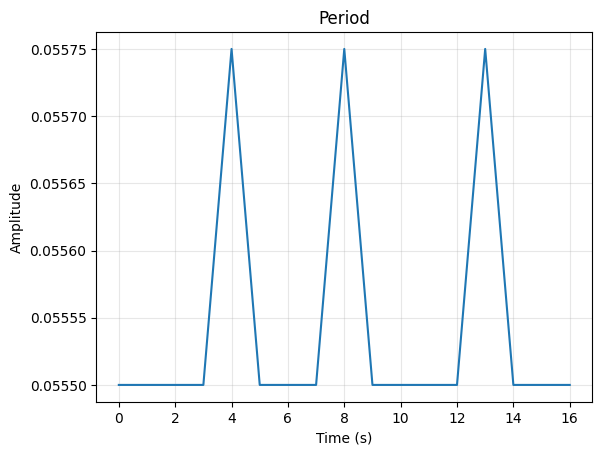

In [ ]:
diff_period = np.diff(t_ref[peaks[0]])
plt.plot(diff_period)
plt.title('Period')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

In [ ]:
f_obs = 1/np.mean(diff_period)
print(f'Observed frequency: {f_obs:.2f} Hz')


Observed frequency: 18.00 Hz


**Quantization** (analog -> digital) is the process of mapping the continuous amplitude values to a finite set of digital values. In practice, the continuous-time signal is sampled and quantized to create a discrete-time signal.



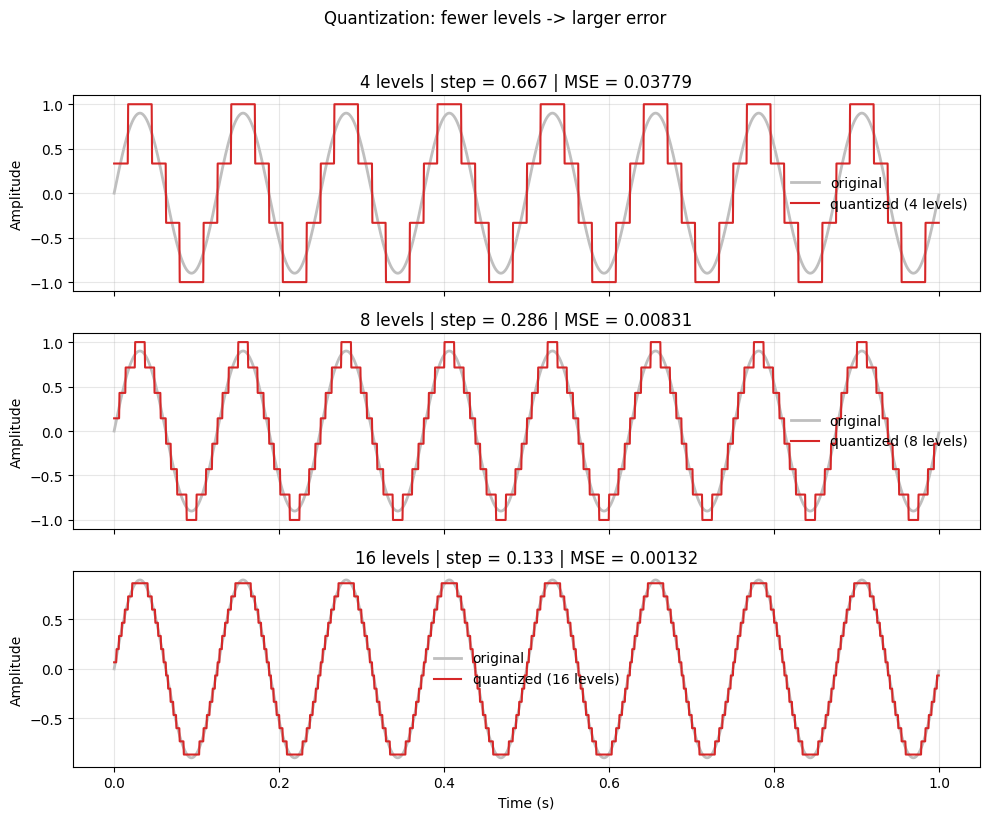

In [41]:
import numpy as np
import matplotlib.pyplot as plt

fs_dense = 2000
T = 1.0
f = 8
t = np.linspace(0, T, int(fs_dense * T), endpoint=False)
x = 0.9 * np.sin(2 * np.pi * f * t)

# Quantization function
def quantize(signal, n_levels, x_min=-1.0, x_max=1.0):
    step = (x_max - x_min) / (n_levels - 1)
    x_clip = np.clip(signal, x_min, x_max)
    x_q = np.round((x_clip - x_min) / step) * step + x_min
    return x_q, step

levels_list = [4, 8, 16]
fig, axes = plt.subplots(len(levels_list), 1, figsize=(10, 8), sharex=True)

for ax, L in zip(axes, levels_list):
    x_q, step = quantize(x, n_levels=L, x_min=-1, x_max=1)
    err = x - x_q
    mse = np.mean(err**2)

    ax.plot(t, x, color='0.75', lw=2, label='original')
    ax.plot(t, x_q, color='C3', lw=1.5, label=f'quantized ({L} levels)')
    ax.set_title(f'{L} levels | step = {step:.3f} | MSE = {mse:.5f}')
    ax.set_ylabel('Amplitude')
    ax.grid(alpha=0.3)
    ax.legend(frameon=False)

axes[-1].set_xlabel('Time (s)')
plt.suptitle('Quantization: fewer levels -> larger error', y=1.02)
plt.tight_layout()
plt.show()

Demo with the sound file:

Loaded: /Users/dkleeva/Library/Caches/librosa/456440__inspectorj__bird-whistling-robin-single-13.ogg
fs=22050 Hz, duration=2.70 s
Original:


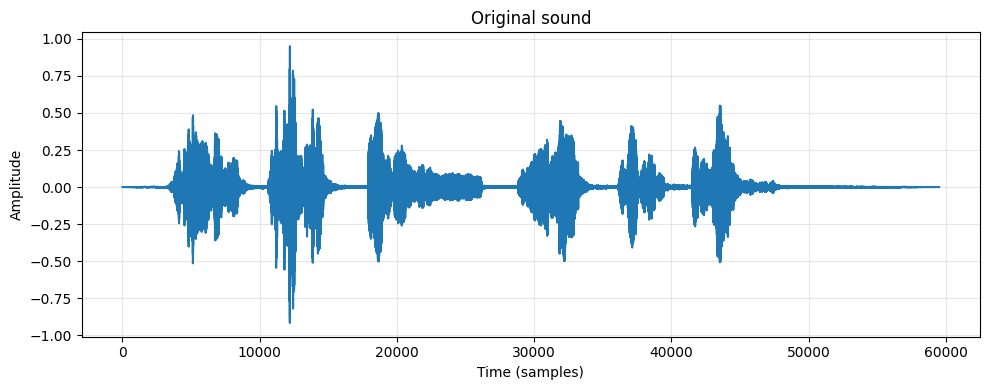

In [43]:
# %pip install librosa soundfile scipy

import librosa
from scipy.signal import resample_poly
from IPython.display import Audio, display

path = librosa.ex("robin") 
x, fs = librosa.load(path, sr=None, mono=True)

x = 0.95 * x / (np.max(np.abs(x)) + 1e-12)

print(f"Loaded: {path}")
print(f"fs={fs} Hz, duration={len(x)/fs:.2f} s")
print("Original:")
display(Audio(x, rate=fs))

plt.figure(figsize=(10, 4))
plt.plot(x, lw=1.5)
plt.title('Original sound')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<div style="color: blue;">
Compute the representative frequency content of the sound.
</div>

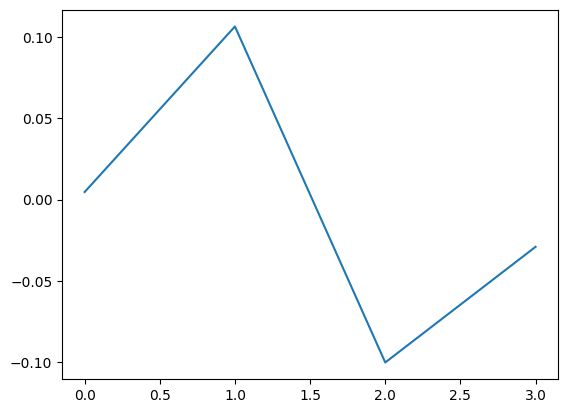

In [44]:
tmin, tmax = 11042, 11046
plt.plot(x[tmin:tmax], lw=1.5)

In [45]:
T=(tmax-tmin)/fs
f_obs=1/T
f_obs

5512.5

Let's check ourselves!

**Spectrum (first intuition without formal definition)**

A time signal tells us how amplitude changes over time.  
A spectrum is another view of the same signal: it shows how strongly different oscillation rates (frequencies, in Hz) are present.

Important: the spectrum does **not** add new data; it is a re-expression of the same recording in frequency terms.  
So we use two complementary views:

- **Time domain:** when changes happen
- **Frequency domain (spectrum):** which rhythms are present and how strong they are

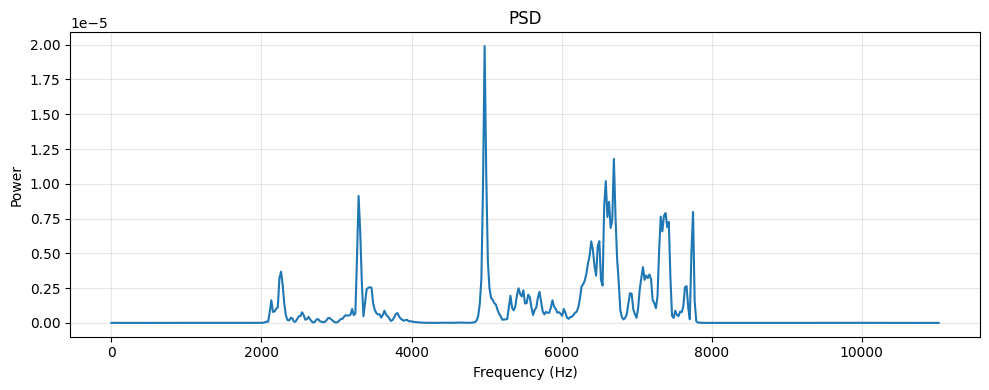

In [46]:
plt.figure(figsize=(10, 4))
from scipy.signal import welch
f, Pxx = welch(x, fs=fs, nperseg=1024)
plt.plot(f, Pxx, lw=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.grid(alpha=0.3)
plt.tight_layout()

<div style="color: blue;">
Now let's listen to the sound under sampling and quantization.
</div>

In [ ]:
def normalize(sig, peak=0.95):
    return peak * sig / (np.max(np.abs(sig)) + 1e-12)

def degrade_sampling_keep_pitch(sig, fs_in, fs_low):
    x_low = resample_poly(sig, fs_low, fs_in)
    x_back = resample_poly(x_low, fs_in, fs_low)

    if len(x_back) > len(sig):
        x_back = x_back[:len(sig)]
    elif len(x_back) < len(sig):
        x_back = np.pad(x_back, (0, len(sig) - len(x_back)))

    return normalize(x_back)

x0 = normalize(x)

low_rates = [16000, 8000, 4000, 1000]  

print(f"Original fs = {fs} Hz")
print("\nOriginal playback:")
display(Audio(x0, rate=fs))

for fs_low in low_rates:
    x_new = degrade_sampling_keep_pitch(x0, fs, fs_low)
    print(f"\nSampling degraded via {fs_low} Hz -> played at {fs} Hz")
    display(Audio(x_new, rate=fs))

Original fs = 22050 Hz

Original playback:



Sampling degraded via 16000 Hz -> played at 22050 Hz



Sampling degraded via 8000 Hz -> played at 22050 Hz



Sampling degraded via 4000 Hz -> played at 22050 Hz



Sampling degraded via 1000 Hz -> played at 22050 Hz


In [48]:

def quantize_bits(sig, bits):
    levels = 2 ** bits
    x_min, x_max = -1.0, 1.0
    step = (x_max - x_min) / (levels - 1)
    x_clip = np.clip(sig, x_min, x_max)
    x_q = np.round((x_clip - x_min) / step) * step + x_min
    return x_q, step

x0 = normalize(x)

print(f"Reference playback (original): fs={fs} Hz")
display(Audio(x0, rate=fs))

bit_depths = [16, 8, 4, 2]

for bits in bit_depths:
    x_q, step = quantize_bits(x0, bits)
    x_q = normalize(x_q)  # keep loudness comparable
    mse = np.mean((x0 - x_q) ** 2)

    print(f"\n{bits}-bit quantization | levels={2**bits} | step={step:.6f} | MSE={mse:.8f}")
    display(Audio(x_q, rate=fs))

Reference playback (original): fs=22050 Hz



16-bit quantization | levels=65536 | step=0.000031 | MSE=0.00000000



8-bit quantization | levels=256 | step=0.007843 | MSE=0.00000666



4-bit quantization | levels=16 | step=0.133333 | MSE=0.00248341



2-bit quantization | levels=4 | step=0.666667 | MSE=0.07708976


## Signal building blocks

### Unit sample (impulse) signal

The **unit sample** (or discrete impulse) is denoted by $\delta[n]$:

$$
\delta[n] =
\begin{cases}
1, & n=0 \\
0, & n\neq 0
\end{cases}
$$

It is the simplest nonzero discrete-time signal: only one sample is equal to 1, all others are 0.

Why it is important:

- It is a basic building block for discrete signals.
- Any discrete signal can be represented as a weighted sum of shifted impulses.
- In system analysis, the response to $\delta[n]$ (impulse response) tells us how a linear system behaves.

Intuition: $\delta[n]$ is a “one-sample click” in time.

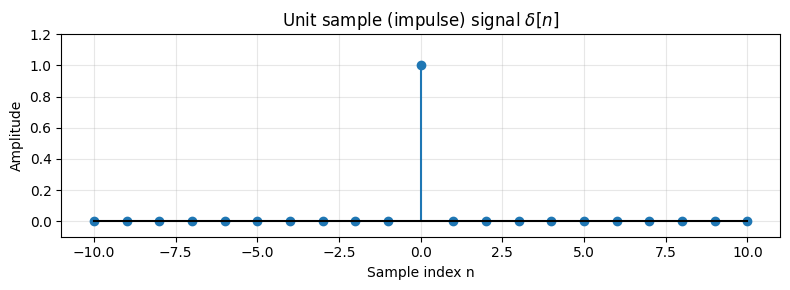

In [49]:
n = np.arange(-10, 11)

delta = np.zeros_like(n, dtype=float)
delta[n == 0] = 1.0

plt.figure(figsize=(8, 3))
plt.stem(n, delta, linefmt='C0-', markerfmt='C0o', basefmt='k-')
plt.title('Unit sample (impulse) signal $\\delta[n]$')
plt.xlabel('Sample index n')
plt.ylabel('Amplitude')
plt.ylim(-0.1, 1.2)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The shift:

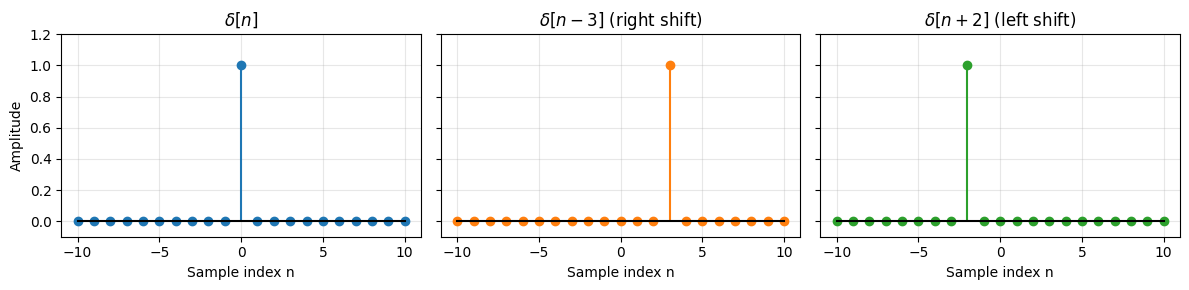

In [50]:
import numpy as np
import matplotlib.pyplot as plt


n = np.arange(-10, 11)

delta = np.zeros_like(n, dtype=float)
delta[n == 0] = 1.0

k_right = 3
k_left = 2

delta_right = np.zeros_like(n, dtype=float) 
delta_right[n == k_right] = 1.0

delta_left = np.zeros_like(n, dtype=float)   
delta_left[n == -k_left] = 1.0

fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

ax[0].stem(n, delta, linefmt='C0-', markerfmt='C0o', basefmt='k-')
ax[0].set_title(r'$\delta[n]$')

ax[1].stem(n, delta_right, linefmt='C1-', markerfmt='C1o', basefmt='k-')
ax[1].set_title(r'$\delta[n-3]$ (right shift)')

ax[2].stem(n, delta_left, linefmt='C2-', markerfmt='C2o', basefmt='k-')
ax[2].set_title(r'$\delta[n+2]$ (left shift)')

for a in ax:
    a.set_xlabel('Sample index n')
    a.set_ylim(-0.1, 1.2)
    a.grid(alpha=0.3)

ax[0].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

<div style="color: blue;">
Show that any discrete signal can be represented as a weighted sum of shifted impulses.
</div>

Max reconstruction error: 0.00e+00


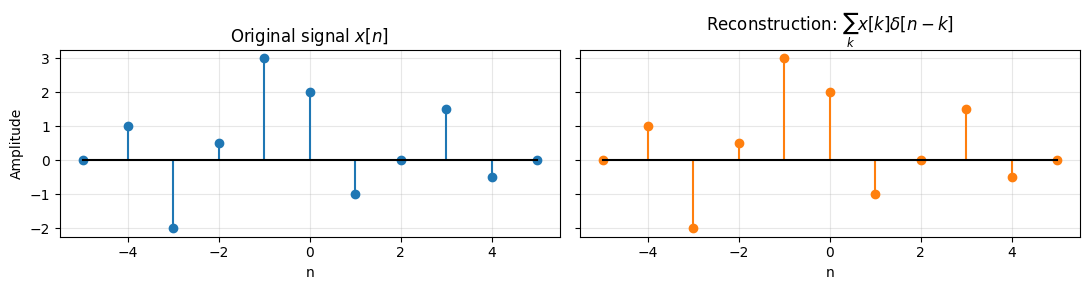

In [ ]:
n = np.arange(-5, 6)


x = np.array([0, 1, -2, 0.5, 3, 2, -1, 0, 1.5, -0.5, 0], dtype=float)


x_rec = np.zeros_like(x)

for i, k in enumerate(n):
    # delta[n-k]: 1 at n=k, else 0
    delta_shifted = np.zeros_like(x)
    delta_shifted[i] = 1.0
    x_rec += x[i] * delta_shifted


err = np.max(np.abs(x - x_rec))
print(f"Max reconstruction error: {err:.2e}")

fig, ax = plt.subplots(1, 2, figsize=(11, 3), sharey=True)

ax[0].stem(n, x, linefmt='C0-', markerfmt='C0o', basefmt='k-')
ax[0].set_title('Original signal $x[n]$')
ax[0].set_xlabel('n')
ax[0].set_ylabel('Amplitude')
ax[0].grid(alpha=0.3)

ax[1].stem(n, x_rec, linefmt='C1-', markerfmt='C1o', basefmt='k-')
ax[1].set_title(r'Reconstruction: $\sum_k x[k]\delta[n-k]$')
ax[1].set_xlabel('n')
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Unit step signal

The **unit step** signal is denoted by $u[n]$:

$$
u[n] =
\begin{cases}
1, & n \ge 0 \\
0, & n < 0
\end{cases}
$$

It models a signal that is "off" before $(n=0$ and "on" from $n=0$ onward.

Why it is important:

- It is used to represent signal onset (sudden start).
- Many practical signals can be written using shifted/scaled step functions.
- It is closely related to the unit sample:

$$
\delta[n] = u[n] - u[n-1]
$$

(the impulse is the discrete difference of two steps).

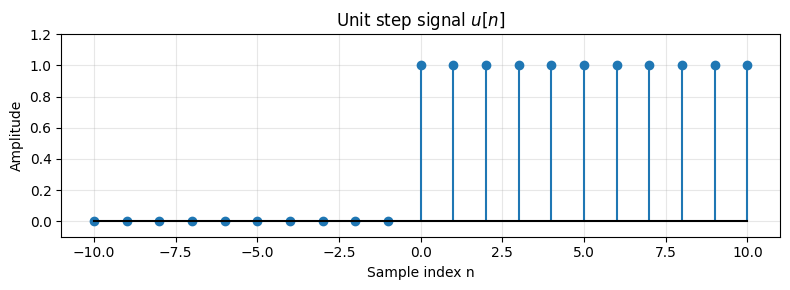

In [52]:
n = np.arange(-10, 11)

# Unit step: u[n] = 1 for n>=0, 0 otherwise
u = (n >= 0).astype(float)

plt.figure(figsize=(8, 3))
plt.stem(n, u, linefmt='C0-', markerfmt='C0o', basefmt='k-')
plt.title('Unit step signal $u[n]$')
plt.xlabel('Sample index n')
plt.ylabel('Amplitude')
plt.ylim(-0.1, 1.2)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<div style="color: blue;">
Show that the impulse is the discrete difference of the two steps.
</div>

All equal? True


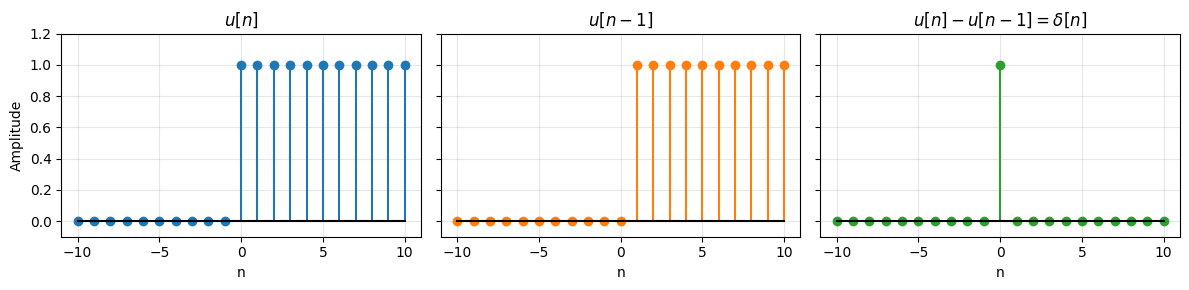

In [53]:
n = np.arange(-10, 11)

# Unit steps
u_n = (n >= 0).astype(float)      # u[n]
u_n1 = (n >= 1).astype(float)     # u[n-1]

# Discrete difference of steps
delta_from_steps = u_n - u_n1

# True impulse for comparison
delta_true = (n == 0).astype(float)

print("All equal?", np.array_equal(delta_from_steps, delta_true))

fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

ax[0].stem(n, u_n, linefmt='C0-', markerfmt='C0o', basefmt='k-')
ax[0].set_title(r'$u[n]$')

ax[1].stem(n, u_n1, linefmt='C1-', markerfmt='C1o', basefmt='k-')
ax[1].set_title(r'$u[n-1]$')

ax[2].stem(n, delta_from_steps, linefmt='C2-', markerfmt='C2o', basefmt='k-')
ax[2].set_title(r'$u[n]-u[n-1]=\delta[n]$')

for a in ax:
    a.set_xlabel('n')
    a.set_ylim(-0.1, 1.2)
    a.grid(alpha=0.3)

ax[0].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

### Other basic signals (preview)

Besides impulse and step, other common signal representations are:

- **Constant (DC) signal:** $x[n] = C$  
  A fixed level over time (baseline component).

- **Ramp signal:** $r[n] = n\,u[n]$  
  Increases linearly with sample index (simple trend model).

- **Exponential signal:** $x[n] = a^n u[n]$  
  Models growth ($|a|>1$) or decay ($0<|a|<1$); with $a<0$, signs alternate.